In [1]:
import numpy
import density_peaks_clustering as peakc
import matplotlib.pyplot as plt

In [2]:
X = numpy.load('data/X.npy')

In [3]:
d, c = peakc.get_deltas_and_counts(X, d_c=0.25)

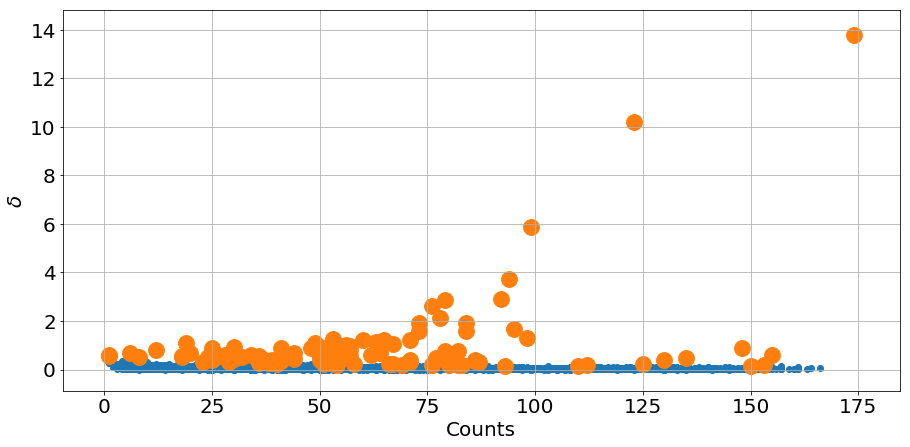

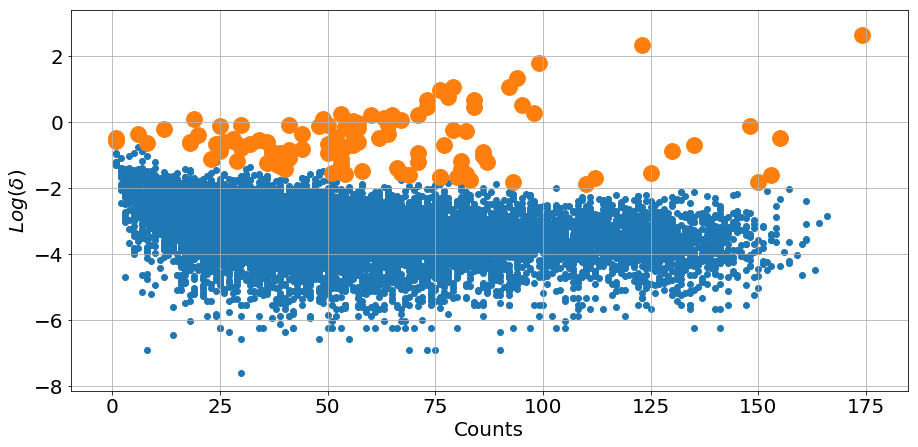

Number of centers is 108


In [4]:
n_std = 7
centers = peakc.delta_counts_plot(d, c, n_std=n_std)
_ = peakc.delta_counts_plot(d, c, log=True, n_std=n_std)
print('Number of centers is {}'.format(centers.shape[0]))

In [5]:
centers_, core_cluster_members_, assingment_core_ = peakc.get_clusters(X, d, c, d_c=0.25, n_std=n_std)
n_centers = centers.shape[0]
print('Number of centers is {}'.format(n_centers))


Number of centers is 108


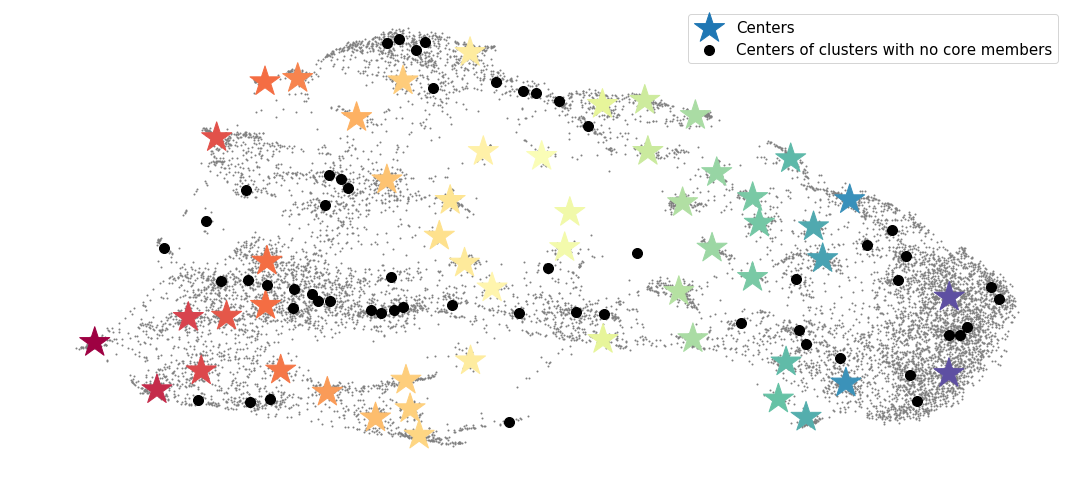

In [6]:
plt.figure(figsize = (15,7))
x = X[:,0].copy()
y = X[:,1].copy()

plt.scatter(x, y, s = 1, color='gray')

centers_inds = numpy.where(assingment_core_[centers_] > -1)[0]
pinds = centers_[centers_inds]
cluster_colors = numpy.zeros(n_centers)
cluster_colors[centers_inds] = x[pinds].copy()
plt.scatter(x[pinds],y[pinds], s=1000, c = cluster_colors[centers_inds], marker = '*', cmap='Spectral', label='Centers')


pinds = centers_[numpy.where(assingment_core_[centers_] == -1)[0]]
plt.scatter(x[pinds],y[pinds], s=100, c='k', label='Centers of clusters with no core members')

plt.legend(fontsize = 15)
plt.axis('off')
plt.tight_layout()
plt.show()

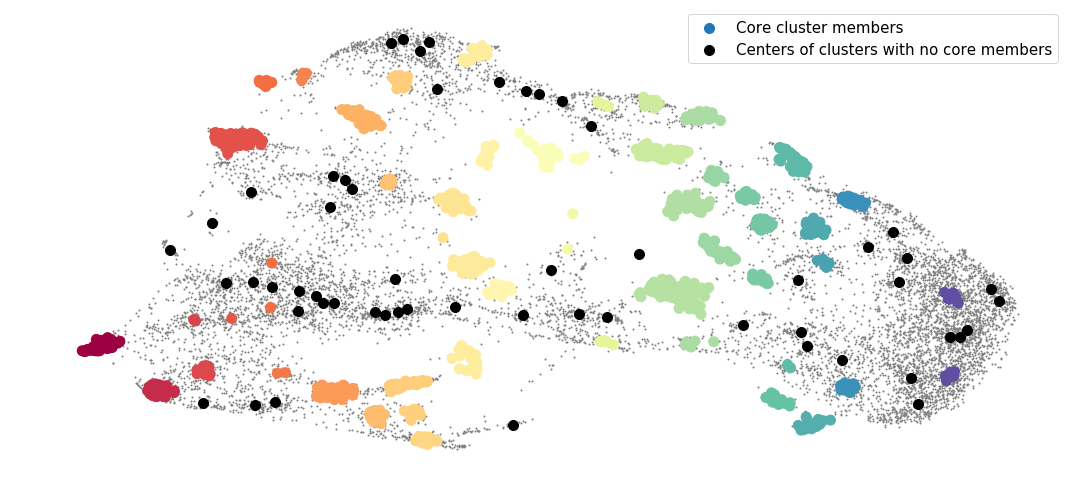

In [7]:
plt.figure(figsize = (15,7))
x = X[:,0].copy()
y = X[:,1].copy()

plt.scatter(x, y, s = 1, color='gray')

pinds = numpy.where(assingment_core_ > -1)[0]
plt.scatter(x[pinds],y[pinds],s=100, c = cluster_colors[assingment_core_[pinds].astype(int)], cmap = 'Spectral', label='Core cluster members')

pinds = centers_[numpy.where(assingment_core_[centers_] == -1)[0]]
plt.scatter(x[pinds],y[pinds], s=100, c='k', label='Centers of clusters with no core members')

plt.legend(fontsize = 15)
plt.axis('off')
plt.tight_layout()
plt.show()